Submitted by Mahnoor Imran

In [1]:
# Install required libraries
!pip install yfinance kaggle python-dotenv requests


In [2]:
import os
folders = [
    "data/raw/api",
    "data/raw/kaggle",
    "data/raw/yfinance",
    "data/processed",
    "config"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Assignment 1 folders created.")


Assignment 1 folders created.


In [18]:
import os

# API keys here
os.environ["NEWS_API_KEY"] = "4bcf286a8f3d4a209d8a2b090298ccd7"
os.environ["KAGGLE_USERNAME"] = "mahnoorimran2026"
os.environ["KAGGLE_KEY"] = "KGAT_63fe84f5f689a013443f1de63d805743"


In [4]:
import requests
import pandas as pd
import os
import json

def extract_api_data():
    api_key = os.getenv("NEWS_API_KEY")

    url = "https://newsapi.org/v2/everything"

    params = {
        "q": "digital payments OR fintech OR mobile payments",
        "language": "en",
        "sortBy": "publishedAt",
        "pageSize": 50,
        "apiKey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    # Save raw JSON
    with open("data/raw/api/news_raw.json", "w") as f:
        json.dump(data, f)

    # Convert to DataFrame
    articles = data["articles"]
    df = pd.DataFrame(articles)

    # Save processed CSV
    df.to_csv("data/processed/news_processed.csv", index=False)
    df.to_json("data/processed/news_processed.json", orient="records")

    return df

news_df = extract_api_data()
news_df.head()


,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (David Kushner),Scam on rye: The inside story of a $100 millio...,"One New Jersey deli, two university endowments...",https://www.businessinsider.com/new-jersey-del...,https://i.insider.com/69850caba645d1188188cc4e...,2026-02-15T09:09:01Z,"When their scandal broke on April 15, 2021, Pa..."
1,"{'id': None, 'name': 'CNA'}",None,Visa-only Games highlights Europe's payments h...,"MILAN, Feb 15 : Anyone trying to buy a souveni...",https://www.channelnewsasia.com/sport/visa-onl...,https://dam.mediacorp.sg/image/upload/s--kd1KJ...,2026-02-15T08:04:54Z,"MILAN, Feb 15 : Anyone trying to buy a souveni..."
2,"{'id': None, 'name': 'newsBTC'}",Semilore Faleti,Solana Funding Rates Hit 17-Day Negative Strea...,Solana (SOL) has been significantly affected b...,http://www.newsbtc.com/news/solana/solana-fund...,https://www.newsbtc.com/wp-content/uploads/202...,2026-02-15T05:00:23Z,Semilore Faleti is a cryptocurrency writer spe...
3,"{'id': None, 'name': 'Yahoo Entertainment'}",Ashar Jawad,"Strategy Inc (MSTR) a Strong Buy, Analysts For...",Strategy Inc (NASDAQ:MSTR) is among the 10 bes...,https://finance.yahoo.com/news/strategy-inc-ms...,https://s.yimg.com/ny/api/res/1.2/yOZMKK_HUPFX...,2026-02-15T04:52:27Z,Strategy Inc (NASDAQ:MSTR) is among the 10 bes...
4,"{'id': None, 'name': 'The Sunday Guardian'}",Amreen Ahmad,"Pine Labs Resets Valuation, Posts Profit Turna...",Pine Labs is a homegrown merchant commerce and...,https://sundayguardianlive.com/business/pine-l...,https://sundayguardianlive.com/wp-content/uplo...,2026-02-15T01:00:42Z,47Pine Labs is a homegrown merchant commerce a...


In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi

def extract_kaggle_data():
    api = KaggleApi()
    api.authenticate()

    dataset = "ealaxi/paysim1"   # Example mobile money fraud dataset

    api.dataset_download_files(dataset, path="data/raw/kaggle", unzip=True)

    # Load CSV
    df = pd.read_csv("data/raw/kaggle/PS_20174392719_1491204439457_log.csv")

    # Save processed formats
    df.to_csv("data/processed/kaggle_processed.csv", index=False)
    df.to_json("data/processed/kaggle_processed.json", orient="records")

    return df

kaggle_df = extract_kaggle_data()
kaggle_df.head()


Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
import yfinance as yf

def extract_yfinance_data():
    tickers = ["PYPL", "V", "MA"]

    df = yf.download(tickers, start="2020-01-01", end="2025-01-01")

    # Save raw
    df.to_csv("data/raw/yfinance/fintech_stocks_raw.csv")

    # Reset index for processing
    df_reset = df.reset_index()

    df_reset.to_csv("data/processed/yfinance_processed.csv", index=False)
    df_reset.to_json("data/processed/yfinance_processed.json", orient="records")

    return df_reset

yfinance_df = extract_yfinance_data()
yfinance_df.head()


/tmp/ipython-input-3681573442.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  3 of 3 completed


Price        Date       Close                                High              \
Ticker                     MA        PYPL           V          MA        PYPL   
0      2020-01-02  292.898499  110.494568  182.809311  293.033642  110.953506   
1      2020-01-03  290.040833  108.509155  181.355331  291.962036  110.165323   
2      2020-01-06  290.813202  109.915901  180.963181  290.909720  109.965789   
3      2020-01-07  289.828522  109.417053  180.484940  292.888914  111.302693   
4      2020-01-08  294.942474  111.562096  183.574478  296.730889  112.380204   

Price                      Low                                Open  \
Ticker           V          MA        PYPL           V          MA   
0       182.828445  289.143004  109.022971  180.513679  290.069798   
1       182.656193  288.274129  108.509155  179.748378  289.104375   
2       180.982315  285.783347  107.192202  179.021455  287.077005   
3       181.833630  289.509946  109.277377  180.398857  291.305612   
4       184.129259  290.505290  109.566708  180.590154  290.766291   

Price                            Volume                     
Ticker        PYPL           V       MA     PYPL         V  
0       109.217521  180.781502  3272400  7418800   8733000  
1       109.237467  180.217076  2501300  7098300   4899700  
2       107.321899  179.824925  3307200  6764500  10109500  
3       111.242834  181.345798  3182000  6898700   4392300  
4       110.145373  181.250152  3224400  8293600   5712000

In [7]:
def run_pipeline():
    print("Extracting API data...")
    extract_api_data()

    print("Extracting Kaggle dataset...")
    extract_kaggle_data()

    print("Extracting Yahoo Finance data...")
    extract_yfinance_data()

    print("EL Pipeline completed successfully.")

run_pipeline()


Extracting API data...
Extracting Kaggle dataset...
Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1


/tmp/ipython-input-3681573442.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  3 of 3 completed

Extracting Yahoo Finance data...
EL Pipeline completed successfully.


                ┌──────────────┐
                │  News API    │
                └──────┬───────┘
                       │
                ┌──────▼───────┐
                │ Extract API  │
                └──────┬───────┘
                       
                ┌──────────────┐
                │ Kaggle Data  │
                └──────┬───────┘
                       │
                ┌──────▼───────┐
                │ Extract CSV  │
                └──────┬───────┘

                ┌──────────────┐
                │ YahooFinance │
                └──────┬───────┘
                       │
                ┌──────▼───────┐
                │ Extract TS   │
                └──────┬───────┘
                       
                       ▼
              data/raw directory
                       ▼
              data/processed (CSV + JSON)


In [8]:
import os

os.makedirs("data/cleaned", exist_ok=True)
print("Cleaned folder created.")


Cleaned folder created.


In [9]:
import pandas as pd

# Load processed kaggle dataset
kaggle_df = pd.read_csv("data/processed/kaggle_processed.csv")

print("Shape of dataset:", kaggle_df.shape)

# Missing values
missing_values = kaggle_df.isna().sum()
print("\nMissing Values:\n", missing_values)

# Duplicate records
duplicates = kaggle_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Shape of dataset: (6362620, 11)

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Number of duplicate rows: 0


In [10]:
yfinance_df = pd.read_csv("data/processed/yfinance_processed.csv")

print("Shape of dataset:", yfinance_df.shape)

# Missing values
missing_values_yf = yfinance_df.isna().sum()
print("\nMissing Values:\n", missing_values_yf)

# Duplicate records
duplicates_yf = yfinance_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates_yf)


Shape of dataset: (1259, 16)

Missing Values:
 Date        1
Close       0
Close.1     0
Close.2     0
High        0
High.1      0
High.2      0
Low         0
Low.1       0
Low.2       0
Open        0
Open.1      0
Open.2      0
Volume      0
Volume.1    0
Volume.2    0
dtype: int64

Number of duplicate rows: 0


In [11]:
# Remove duplicates
kaggle_df = kaggle_df.drop_duplicates()

# Handle missing values (if any)
kaggle_df = kaggle_df.fillna(0)

# Standardize column names
kaggle_df.columns = kaggle_df.columns.str.lower()

# Convert transaction type to category
kaggle_df["type"] = kaggle_df["type"].astype("category")

# Summary statistics
print(kaggle_df.describe())

# Save cleaned dataset
kaggle_df.to_csv("data/cleaned/kaggle_cleaned.csv", index=False)


               step        amount  oldbalanceorg  newbalanceorig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalancedest  newbalancedest       isfraud  isflaggedfraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [12]:
# Remove duplicates
yfinance_df = yfinance_df.drop_duplicates()

# Convert date column
yfinance_df["Date"] = pd.to_datetime(yfinance_df["Date"])

# Sort by date
yfinance_df = yfinance_df.sort_values("Date")

# Forward fill missing values
yfinance_df = yfinance_df.fillna(method="ffill")

print(yfinance_df.describe())

# Save cleaned dataset
yfinance_df.to_csv("data/cleaned/yfinance_cleaned.csv", index=False)


                                Date
count                           1259
mean   2022-07-02 09:04:25.925337600
min              2020-01-02 00:00:00
25%              2021-04-03 00:00:00
50%              2022-07-01 00:00:00
75%              2023-10-02 12:00:00
max              2024-12-31 00:00:00


/tmp/ipython-input-225060058.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  yfinance_df = yfinance_df.fillna(method="ffill")


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


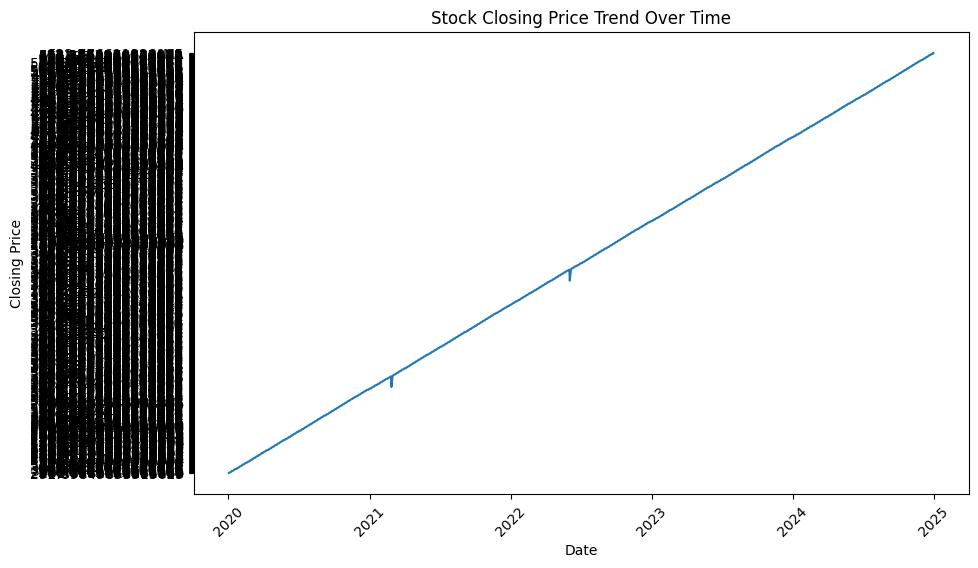

In [14]:
plt.figure(figsize=(10,6))
plt.plot(yfinance_df["Date"], yfinance_df["Close"])
plt.title("Stock Closing Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.show()


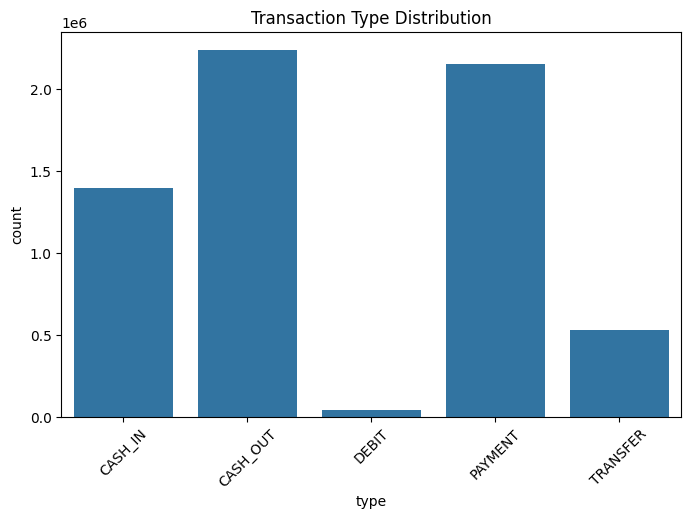

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=kaggle_df, x="type")
plt.title("Transaction Type Distribution")
plt.xticks(rotation=45)
plt.show()


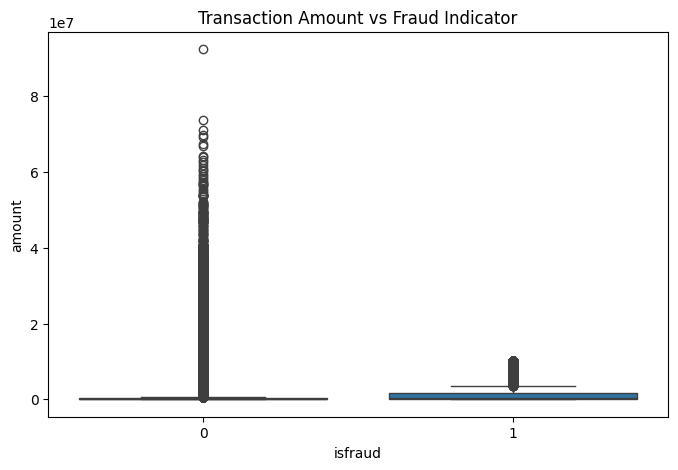

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=kaggle_df, x="isfraud", y="amount")
plt.title("Transaction Amount vs Fraud Indicator")
plt.show()


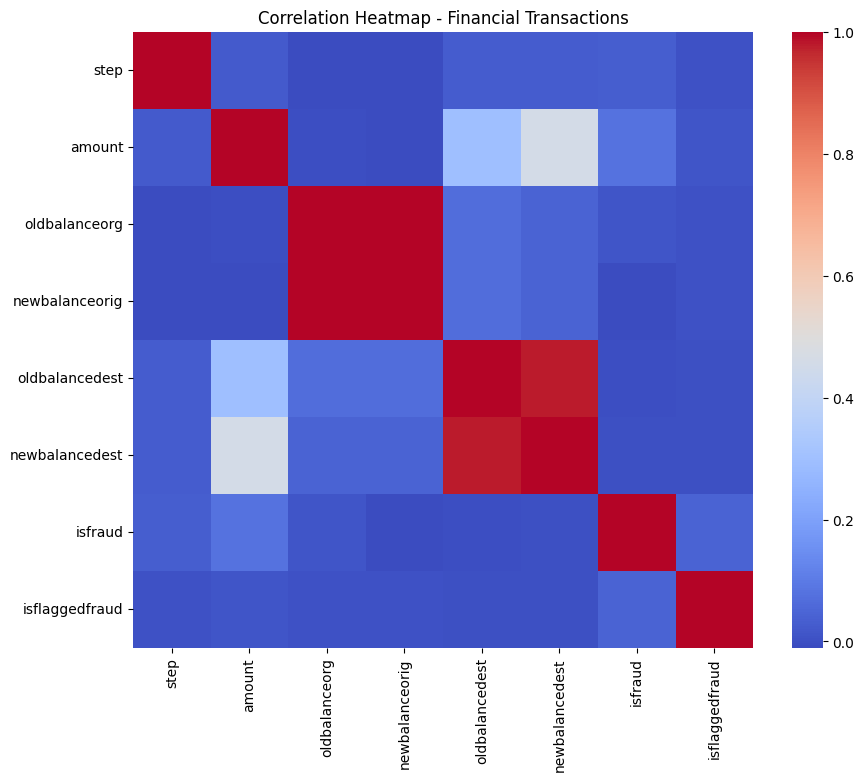

In [17]:
plt.figure(figsize=(10,8))
corr = kaggle_df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap - Financial Transactions")
plt.show()
